In [42]:
import seaborn as sns
import os
from time import time
import pprint
from sklearn.utils import shuffle
import numpy as np
from pandas.plotting import table
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time
pp = pprint.PrettyPrinter(indent=4, compact=True)


"""create dfs"""
cand_list = ['Biden', 'Booker', 'Buttigieg', 'DNC', 'Gabbard', 'Klobuuchar', 'Sanders', 'Steyer', 'Warren', 'Yang']

"""Candidate dataframes"""
biden = dems[dems['candidate'] == 'Biden']
booker = dems[dems['candidate'] == 'Booker']
buttig= dems[dems['candidate'] == 'Buttigieg']
dnc = dems[dems['candidate'] == 'DNC']
gabbard = dems[dems['candidate'] == 'Gabbard']
klob = dems[dems['candidate'] == 'Klobuchar']
sanders = dems[dems['candidate'] =='Sanders']
steyer= dems[dems['candidate'] =='Steyer']
warren = dems[dems['candidate'] == 'Warren']
yang = dems[dems['candidate'] == 'Yang']

dems = pd.read_csv('data\\dems_cleaned_up.csv')
dems.head(2)

,Unnamed: 0,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num
0,0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6
1,1,2019-12-02 18:36:50+00:00,"Between the Ectopic pregnancy BS, the financia...",between ectopic pregnancy bs financial bs heal...,"Sentiment(polarity=0.20000000000000004, subjec...",0.2,0.466667,1,0,"gop, bernie2020, nurseswhotweet, trumpcult",NaN,Sanders,2019-12-02,6


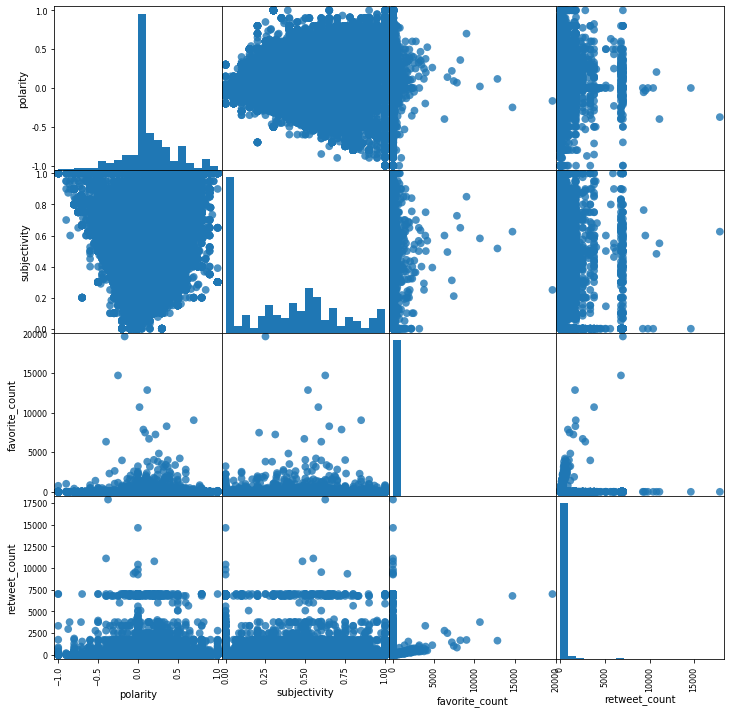

In [7]:
"""Generate pairplot of data overall"""
pd.plotting.scatter_matrix(dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']], #c=np.array(dems[['cand_num']]).reshape(len(dems), ),
                                 figsize=(12, 12), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

#plt.title('Pair Plot of Numerical Data')
plt.savefig('charts\\pairplot_all.png')
plt.show()

Biden


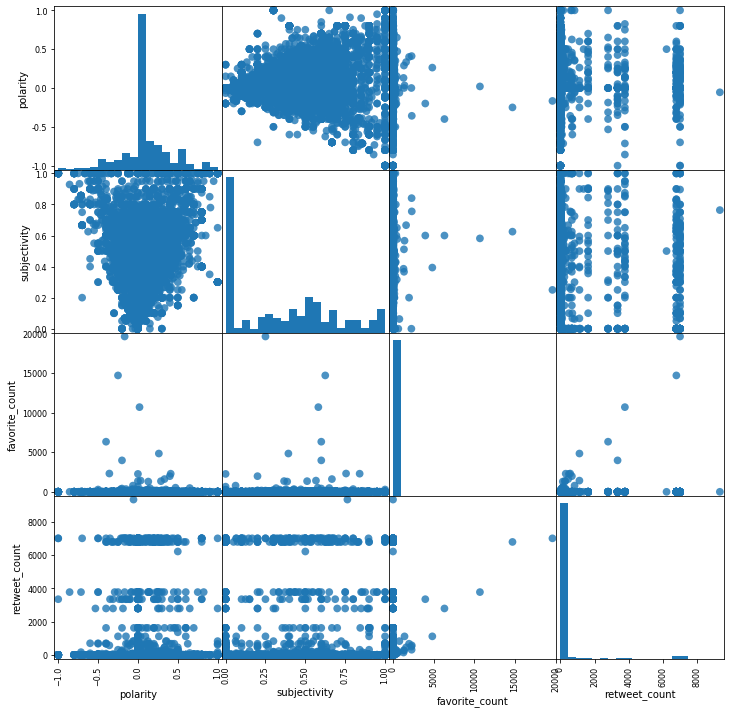

Booker


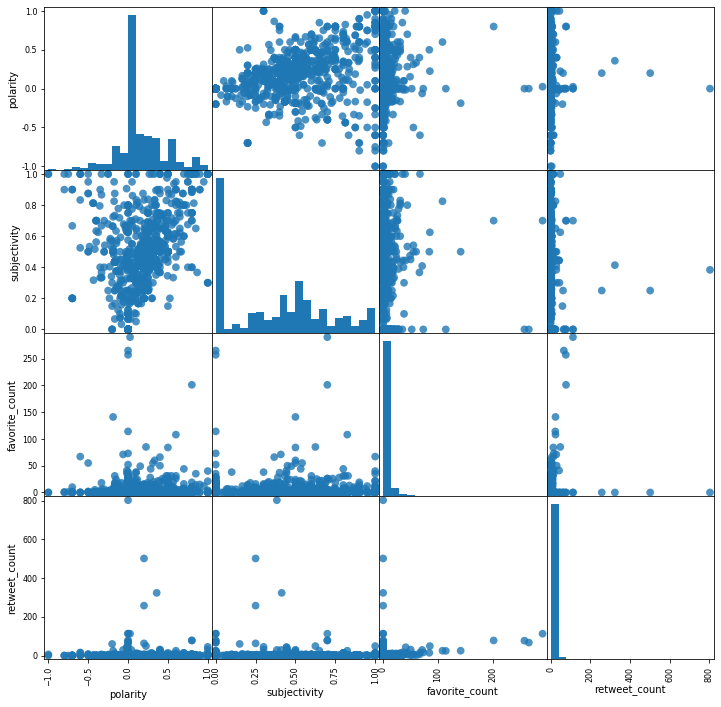

Buttigieg


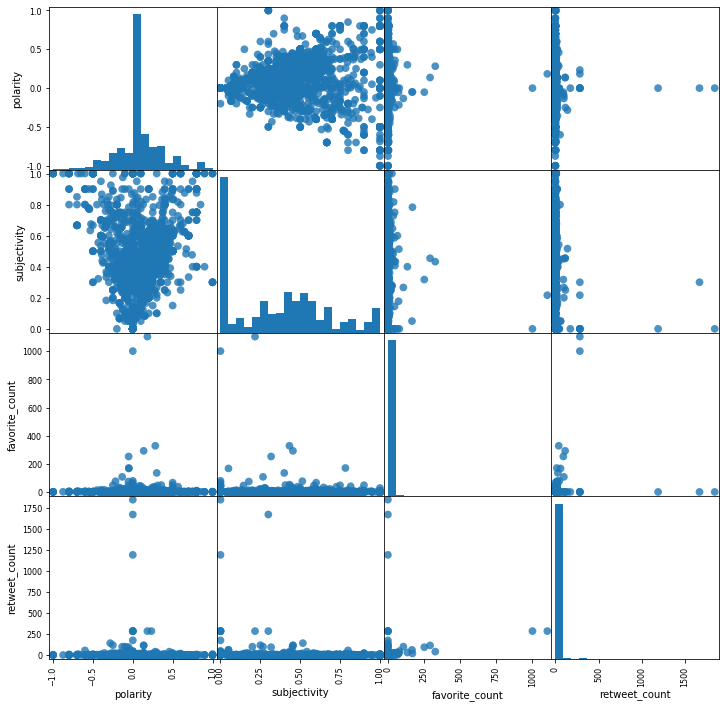

DNC


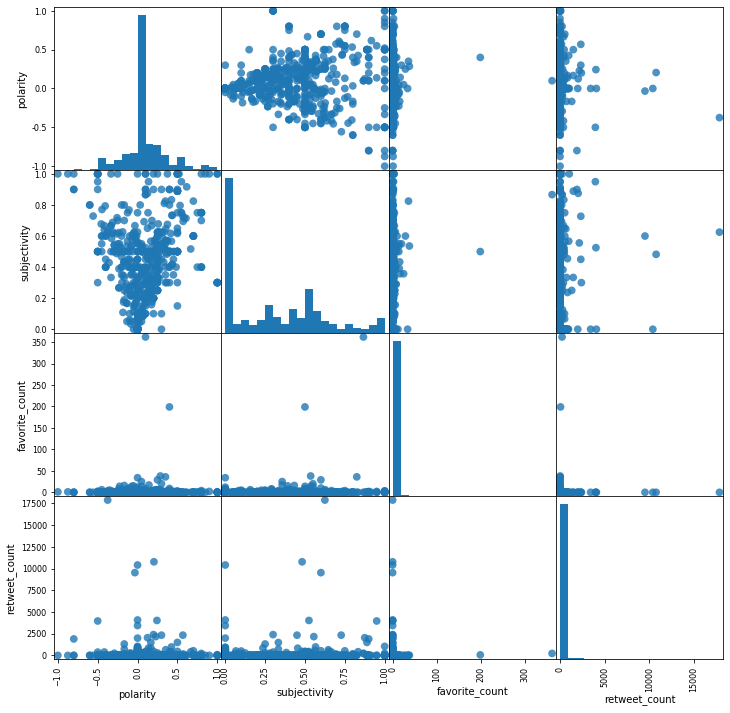

Gabbard


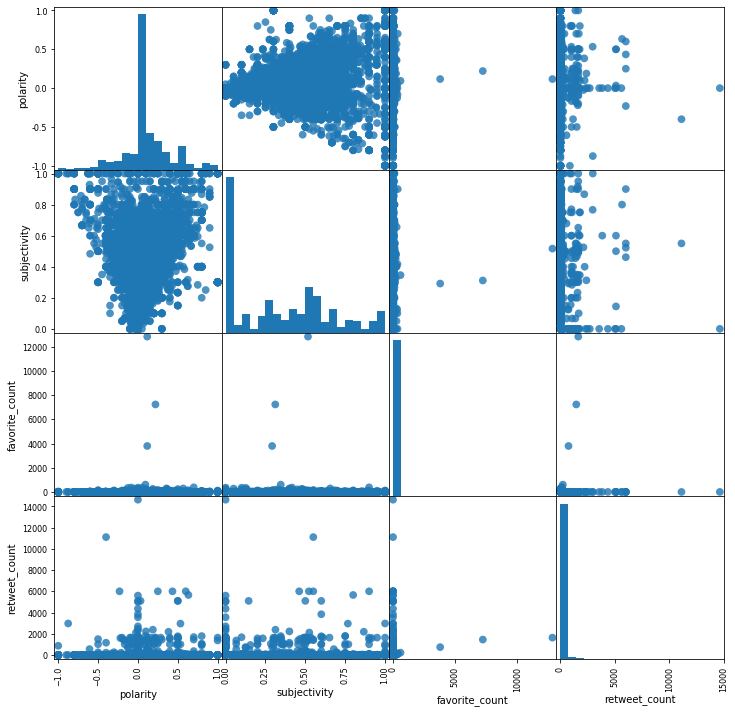

Klobuuchar
candidate Klobuuchar had an error
Sanders


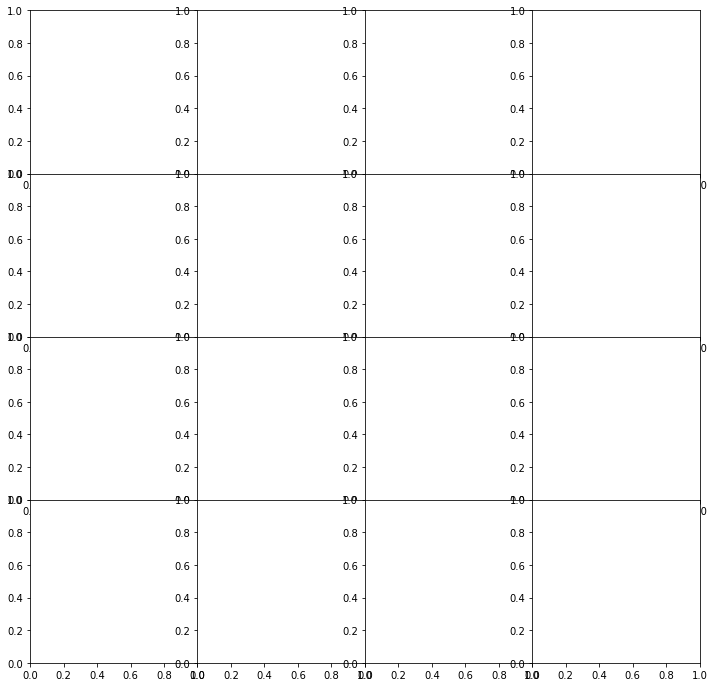

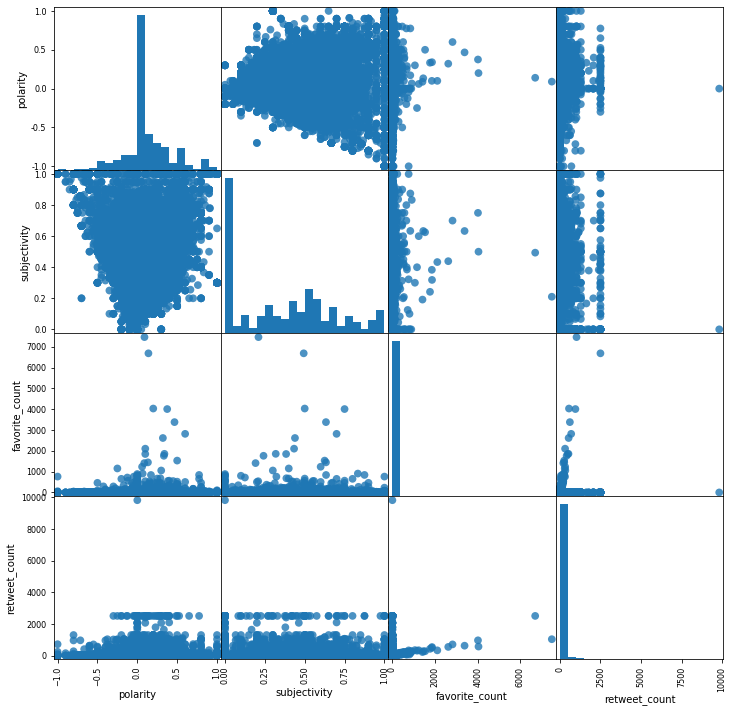

Steyer


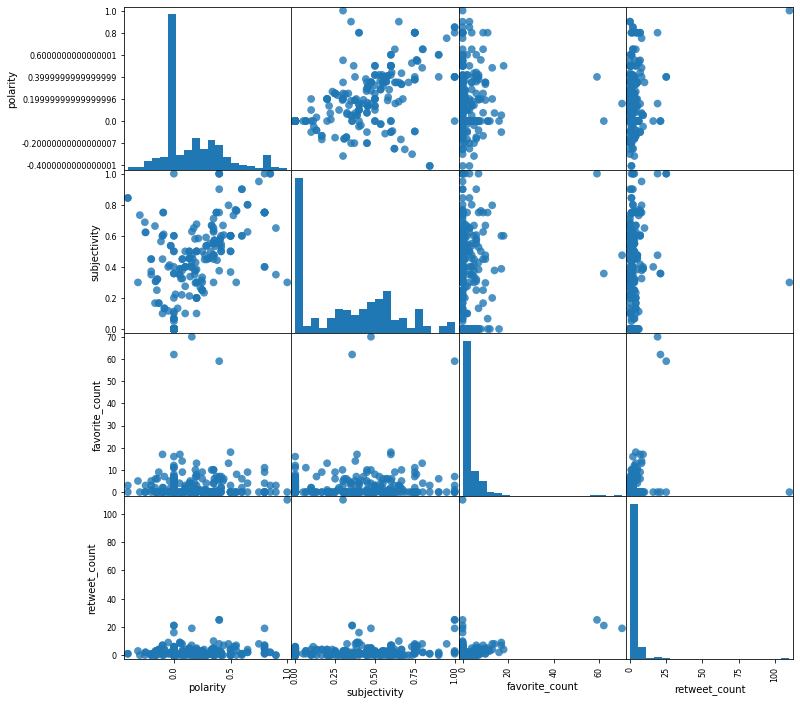

Warren


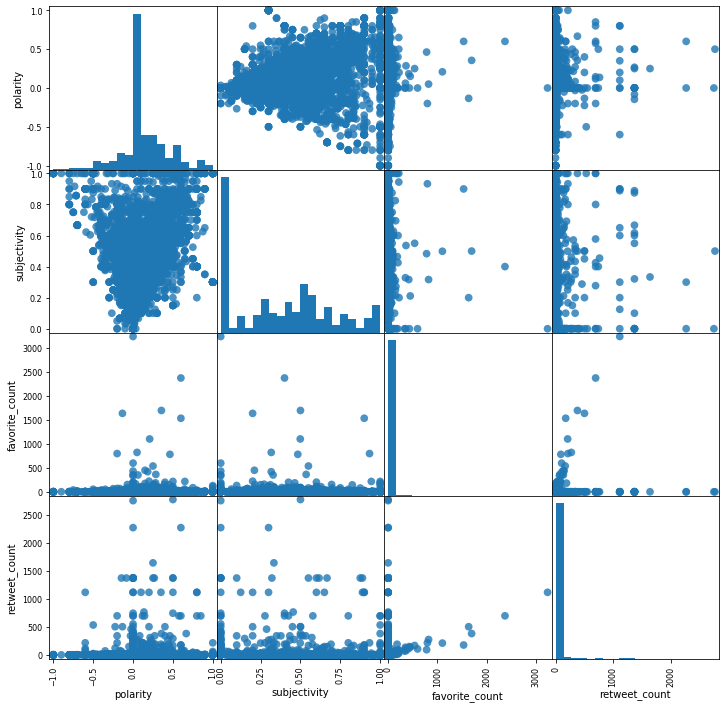

Yang


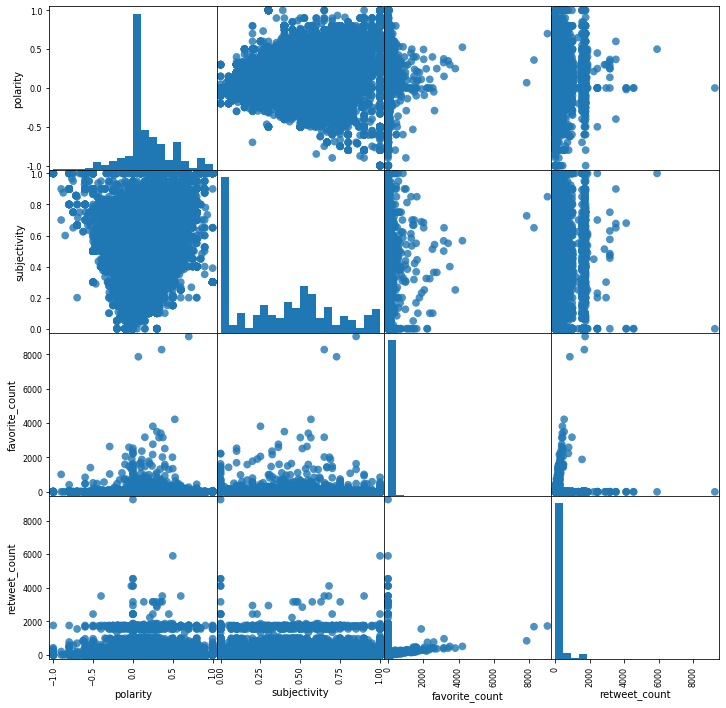

In [12]:
for name in cand_list:
    temp_df = dems[dems['candidate']==name]
    print(name)
    try:
        pd.plotting.scatter_matrix(temp_df[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']], #c=np.array(dems[['cand_num']]).reshape(len(dems), ),
                                         figsize=(12, 12), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

        """save to candidate name"""
        plt.savefig('charts\\pairplot_{}.png'.format(name))
        plt.show()
    except:
        print('candidate {} had an error'.format(name))

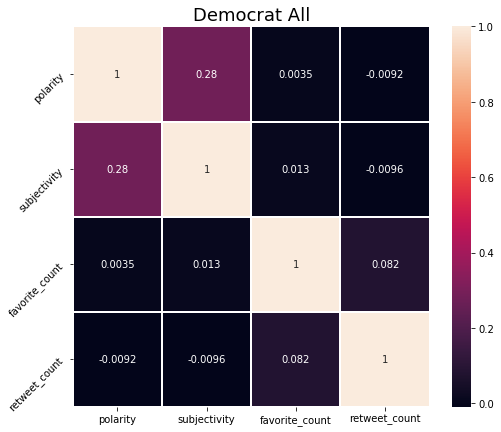

In [123]:
fig, ax = plt.subplots(figsize=(8,7))
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=1)
plt.title('Democrat All', fontsize=18)
plt.yticks(rotation=45)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.invert_yaxis()
plt.savefig('charts\\corr_all.png')
plt.show()

In [13]:
dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.279257,0.003539,-0.009232
subjectivity,0.279257,1.000000,0.013180,-0.009603
favorite_count,0.003539,0.013180,1.000000,0.082230
retweet_count,-0.009232,-0.009603,0.082230,1.000000


In [26]:
dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,60208.000000,60208.000000,60208.000000,60208.000000
mean,0.118126,0.361935,10.616679,90.407089
std,0.290073,0.314634,171.787663,521.743298
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.375000,0.000000,1.000000
75%,0.255682,0.600000,2.000000,4.000000
max,1.000000,1.000000,19606.000000,17889.000000


In [97]:
# fig, ax = plt.subplots(figsize=(3,1))
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)
# table(ax, data=dems[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe())
# ax.set_ylim(0,2)
# plt.savefig('charts\\fivenum_all.png')
# plt.show()

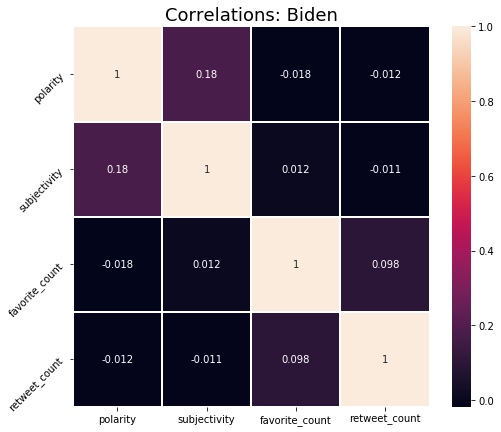

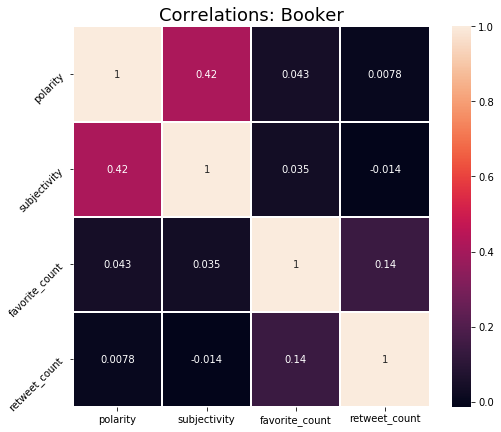

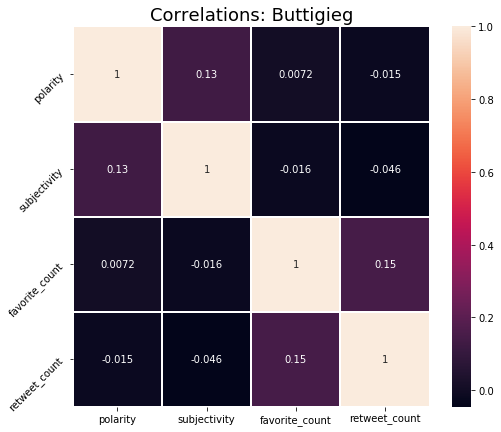

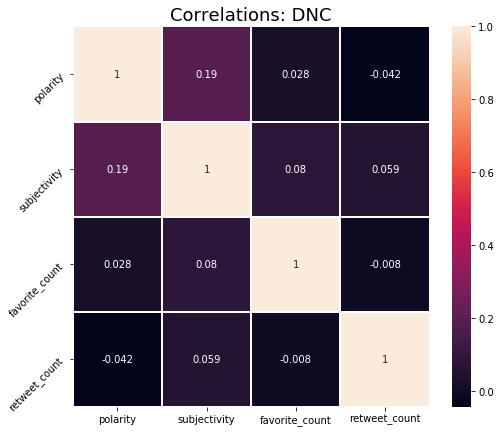

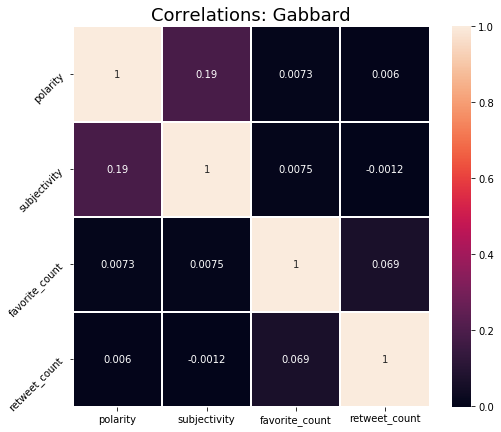

Klobuuchar had an error


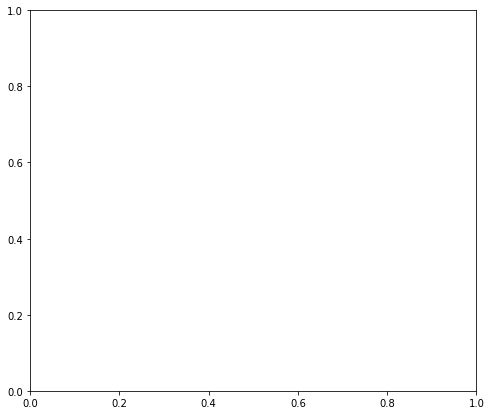

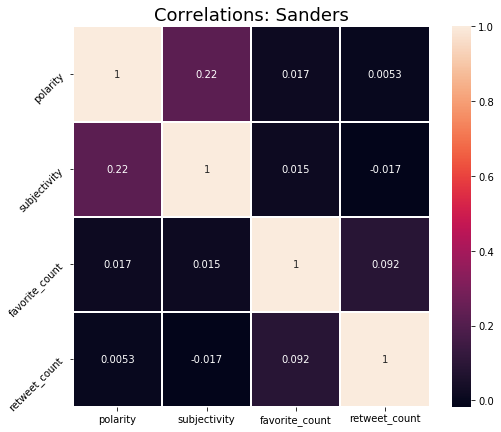

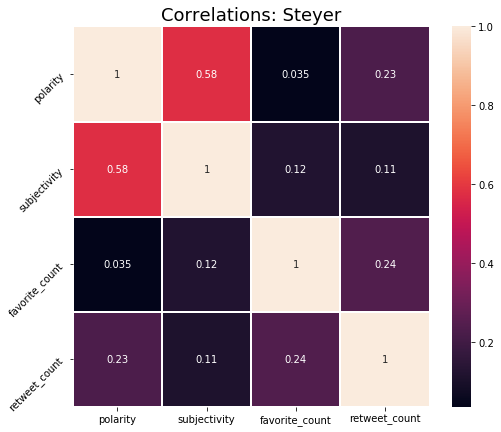

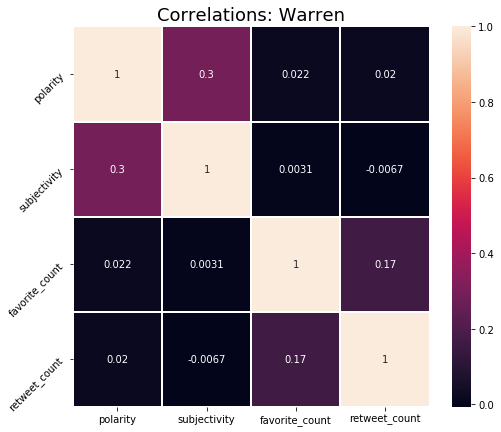

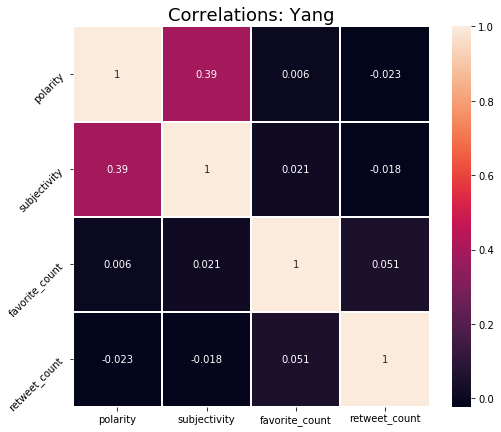

In [124]:
for name in cand_list:
    try:        
        temp_df = dems[dems['candidate']==name]
        fig, ax = plt.subplots(figsize=(8,7))
        #sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
        sns.heatmap(temp_df[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=1)
        plt.title('Correlations: {}'.format(name), fontsize=18)
        plt.yticks(rotation=45)
        ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        ax.invert_yaxis()
        plt.savefig('charts\\corr_{}.png'.format(name))
        plt.show()
    except:
        print('{} had an error'.format(name))

In [15]:
biden[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.179004,-0.018376,-0.011630
subjectivity,0.179004,1.000000,0.011971,-0.011301
favorite_count,-0.018376,0.011971,1.000000,0.097962
retweet_count,-0.011630,-0.011301,0.097962,1.000000


In [27]:
biden[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,7097.000000,7097.000000,7097.000000,7097.000000
mean,0.086513,0.352854,14.375793,277.195153
std,0.291124,0.326447,341.063431,1244.579820
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.350000,0.000000,0.000000
75%,0.220000,0.600000,1.000000,2.000000
max,1.000000,1.000000,19606.000000,9341.000000


In [16]:
booker[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.417047,0.043334,0.007793
subjectivity,0.417047,1.000000,0.035083,-0.014115
favorite_count,0.043334,0.035083,1.000000,0.140602
retweet_count,0.007793,-0.014115,0.140602,1.000000


In [28]:
booker[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.141501,0.378703,5.235122,4.560000
std,0.301960,0.317308,19.334088,33.561606
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.404167,0.000000,0.000000
75%,0.312727,0.600000,3.000000,2.000000
max,1.000000,1.000000,290.000000,803.000000


In [18]:
buttig[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.132886,0.007158,-0.015350
subjectivity,0.132886,1.000000,-0.016288,-0.045781
favorite_count,0.007158,-0.016288,1.000000,0.147131
retweet_count,-0.015350,-0.045781,0.147131,1.000000


In [29]:
buttig[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,1818.000000,1818.000000,1818.000000,1818.000000
mean,0.066613,0.354160,3.795380,5.523102
std,0.275511,0.304550,37.930605,67.150459
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.366964,0.000000,0.000000
75%,0.200000,0.557917,1.000000,1.000000
max,1.000000,1.000000,1104.000000,1844.000000


In [19]:
dnc[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.193421,0.028485,-0.042336
subjectivity,0.193421,1.000000,0.080363,0.058965
favorite_count,0.028485,0.080363,1.000000,-0.008009
retweet_count,-0.042336,0.058965,-0.008009,1.000000


In [30]:
dnc[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,766.000000,766.000000,766.000000,766.000000
mean,0.068914,0.304422,1.701044,144.053525
std,0.263314,0.300716,15.228136,978.930543
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.272917,0.000000,0.000000
75%,0.188631,0.515625,1.000000,2.000000
max,1.000000,1.000000,362.000000,17889.000000


In [20]:
gabbard[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.189800,0.007331,0.006047
subjectivity,0.189800,1.000000,0.007547,-0.001194
favorite_count,0.007331,0.007547,1.000000,0.069053
retweet_count,0.006047,-0.001194,0.069053,1.000000


In [31]:
gabbard[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,5147.000000,5147.000000,5147.000000,5147.000000
mean,0.095570,0.349288,9.488440,55.477171
std,0.288441,0.310928,213.191572,428.551252
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.338611,0.000000,0.000000
75%,0.240154,0.584091,2.000000,2.000000
max,1.000000,1.000000,12842.000000,14635.000000


In [21]:
klob[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,NaN,NaN,NaN,NaN
subjectivity,NaN,NaN,NaN,NaN
favorite_count,NaN,NaN,NaN,NaN
retweet_count,NaN,NaN,NaN,NaN


In [32]:
klob[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [22]:
sanders[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.223412,0.017162,0.005288
subjectivity,0.223412,1.000000,0.014798,-0.017153
favorite_count,0.017162,0.014798,1.000000,0.092436
retweet_count,0.005288,-0.017153,0.092436,1.000000


In [33]:
sanders[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,19698.000000,19698.000000,19698.000000,19698.000000
mean,0.108286,0.360375,7.368819,41.062595
std,0.289073,0.312854,101.930183,225.449557
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.373333,0.000000,1.000000
75%,0.250000,0.600000,2.000000,3.000000
max,1.000000,1.000000,7468.000000,9820.000000


In [23]:
steyer[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.575384,0.034972,0.227885
subjectivity,0.575384,1.000000,0.119581,0.110923
favorite_count,0.034972,0.119581,1.000000,0.240590
retweet_count,0.227885,0.110923,0.240590,1.000000


In [34]:
steyer[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,293.000000,293.000000,293.000000,293.000000
mean,0.156369,0.327036,2.709898,2.863481
std,0.255729,0.290772,7.128551,7.229255
min,-0.406250,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.350000,0.000000,2.000000
75%,0.333333,0.550000,3.000000,3.000000
max,1.000000,1.000000,70.000000,110.000000


In [24]:
warren[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.295470,0.021818,0.019981
subjectivity,0.295470,1.000000,0.003089,-0.006737
favorite_count,0.021818,0.003089,1.000000,0.165860
retweet_count,0.019981,-0.006737,0.165860,1.000000


In [35]:
warren[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,4818.000000,4818.000000,4818.000000,4818.000000
mean,0.126410,0.373863,7.661685,16.959734
std,0.291502,0.314708,78.400142,124.911899
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.383333,0.000000,0.000000
75%,0.285714,0.600000,2.000000,2.000000
max,1.000000,1.000000,3233.000000,2768.000000


In [25]:
yang[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].corr()

,polarity,subjectivity,favorite_count,retweet_count
polarity,1.000000,0.393718,0.005953,-0.022616
subjectivity,0.393718,1.000000,0.020866,-0.017619
favorite_count,0.005953,0.020866,1.000000,0.051121
retweet_count,-0.022616,-0.017619,0.051121,1.000000


In [36]:
yang[['polarity', 'subjectivity', 'favorite_count', 'retweet_count']].describe()

,polarity,subjectivity,favorite_count,retweet_count
count,19546.000000,19546.000000,19546.000000,19546.000000
mean,0.148338,0.369816,14.934974,111.223422
std,0.289695,0.314188,156.562550,340.981918
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.033333,0.393750,0.000000,1.000000
75%,0.300000,0.600000,2.000000,21.000000
max,1.000000,1.000000,9038.000000,9246.000000
